In [90]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline 

In [91]:
train_ch = pd.read_csv('../input/blue-owl-ml-challenge/train.csv')
test_ch = pd.read_csv('../input/blue-owl-ml-challenge/test.csv')

In [92]:
train_ch.isna().sum()

age                             0
cost_of_ad                      0
device_type                     0
gender                        269
in_initial_launch_location      0
income                          0
n_drivers                       0
n_vehicles                      0
prior_ins_tenure                0
outcome                         0
dtype: int64

In [93]:
train_ch.head()

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome
0,56,0.005737,iPhone,M,0,62717,2,1,4,0
1,50,0.004733,desktop,F,0,64328,2,3,2,0
2,54,0.004129,laptop,M,0,83439,1,3,7,0
3,16,0.005117,Android,F,0,30110,2,3,0,0
4,37,0.003635,desktop,M,0,76565,2,1,5,0


In [94]:
train_ch.dropna(axis = 0,inplace = True)
train_ch_data = train_ch.iloc[:,:9]
train_ch_labels = train_ch.iloc[:,9]

In [95]:
column_trans = make_column_transformer((OneHotEncoder(),['device_type','gender']),remainder = 'passthrough')
train_ch_data = column_trans.fit_transform(train_ch_data)

In [96]:
train_ch_labels = train_ch_labels.values

In [97]:
test_ch.dropna(axis = 0,inplace = True)
test_ch = column_trans.fit_transform(test_ch)

In [98]:
train_ch_data.shape

(9731, 14)

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(4,input_shape = (train_ch_data.shape[1],),activation  = 'relu'))
model.add(layers.Dense(4,activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer = optimizers.Adam(),metrics = ['accuracy'])
histy =model.fit(train_ch_data[:1000,:],train_ch_labels[:1000],epochs = 50,batch_size  = 64,validation_data = (train_ch_data[1000:,],train_ch_labels[1000:]))

Train on 1000 samples, validate on 8731 samples
Epoch 1/50
1000/1000 [==============================] - 0s 325us/step - loss: 52.3383 - accuracy: 0.9210 - val_loss: 58.2035 - val_accuracy: 0.8976
Epoch 2/50
1000/1000 [==============================] - 0s 152us/step - loss: 38.8052 - accuracy: 0.9210 - val_loss: 42.3361 - val_accuracy: 0.8976
Epoch 3/50
1000/1000 [==============================] - 0s 149us/step - loss: 27.8073 - accuracy: 0.9210 - val_loss: 28.8829 - val_accuracy: 0.8976
Epoch 4/50
1000/1000 [==============================] - 0s 150us/step - loss: 17.9426 - accuracy: 0.9210 - val_loss: 17.8436 - val_accuracy: 0.8976
Epoch 5/50
1000/1000 [==============================] - 0s 150us/step - loss: 9.9912 - accuracy: 0.9210 - val_loss: 7.5238 - val_accuracy: 0.8976
Epoch 6/50
1000/1000 [==============================] - 0s 148us/step - loss: 2.6695 - accuracy: 0.8250 - val_loss: 0.7288 - val_accuracy: 0.1024
Epoch 7/50
1000/1000 [==============================] - 0s 174us/ste

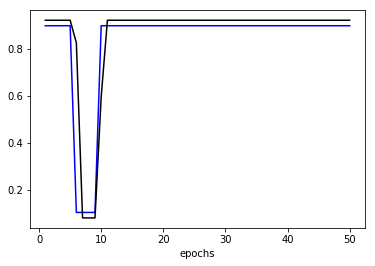

In [100]:
plt.plot(np.arange(1,51),histy.history['val_accuracy'],color = 'b')
plt.plot(np.arange(1,51),histy.history['accuracy'],color = 'k')
plt.xlabel('epochs')
plt.show()

the above graph shows that with the epochs the validation_accuracy and the training_data_accuracy decreases and then increases and then becomes constant after 10 epochs
hence training the network till 10 epochs is enough 


In [102]:
model1 = models.Sequential()
model1.add(layers.Dense(4,input_shape = (train_ch_data.shape[1],),activation  = 'relu'))
model1.add(layers.Dense(4,activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))
model1.compile(loss = 'binary_crossentropy',optimizer = optimizers.Adam(),metrics = ['accuracy'])
histy11 =model.fit(train_ch_data[:1000,:],train_ch_labels[:1000],epochs = 10,batch_size  = 64,validation_data = (train_ch_data[1000:,],train_ch_labels[1000:]))

Train on 1000 samples, validate on 8731 samples
Epoch 1/10
1000/1000 [==============================] - 0s 350us/step - loss: 0.7811 - accuracy: 0.0790 - val_loss: 0.7501 - val_accuracy: 0.1024
Epoch 2/10
1000/1000 [==============================] - 0s 147us/step - loss: 0.7317 - accuracy: 0.0790 - val_loss: 0.7078 - val_accuracy: 0.1024
Epoch 3/10
1000/1000 [==============================] - 0s 150us/step - loss: 0.6924 - accuracy: 0.5490 - val_loss: 0.6760 - val_accuracy: 0.8976
Epoch 4/10
1000/1000 [==============================] - 0s 146us/step - loss: 0.6624 - accuracy: 0.9210 - val_loss: 0.6507 - val_accuracy: 0.8976
Epoch 5/10
1000/1000 [==============================] - 0s 146us/step - loss: 0.6378 - accuracy: 0.9210 - val_loss: 0.6301 - val_accuracy: 0.8976
Epoch 6/10
1000/1000 [==============================] - 0s 154us/step - loss: 0.6175 - accuracy: 0.9210 - val_loss: 0.6124 - val_accuracy: 0.8976
Epoch 7/10
1000/1000 [==============================] - 0s 144us/step - loss

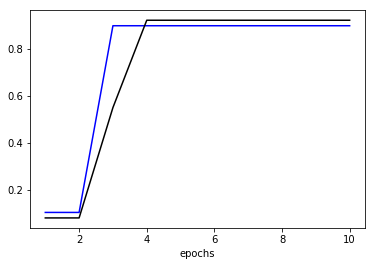

In [104]:
plt.plot(np.arange(1,11),histy11.history['val_accuracy'],color = 'b')
plt.plot(np.arange(1,11),histy11.history['accuracy'],color = 'k')
plt.xlabel('epochs')
plt.show()

In [116]:
test_pred=model.predict(test_ch)

In [117]:
test_pred

array([[0.4059652],
       [0.4059652],
       [0.4059652],
       ...,
       [0.4059652],
       [0.4059652],
       [0.4059652]], dtype=float32)

In [118]:
test_pred = np.where(test_pred<0.5,0,1)

**THE Overall prediction on test data**

In [119]:
test_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])